# 02-Opening FITS
Here you will learn how to open and look up FITS files using astropy.

## 1. Installation
If you have downloaded Anaconda, you will have it by default. Otherwise, please install via, e.g., pip or git.

## 2. Importing and Setting Up
(You don't have to run the first code cell just below)

In [1]:
%load_ext version_information
import time
now = time.strftime("%Y-%m-%d %H:%M:%S (%Z = GMT%z)")
print(f"This notebook was generated at {now} ")

vv = %version_information astropy, numpy, scipy, matplotlib, version_information
for i, pkg in enumerate(vv.packages):
    print(f"{i} {pkg[0]:10s} {pkg[1]:s}")

This notebook was generated at 2019-04-28 19:11:03 (KST = GMT+0900) 
0 Python     3.6.8 64bit [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
1 IPython    6.5.0
2 OS         Darwin 18.5.0 x86_64 i386 64bit
3 astropy    3.1.2
4 numpy      1.16.2
5 scipy      1.2.1
6 matplotlib 3.0.3
7 version_information 1.0.3


In [27]:
from pathlib import Path
import numpy as np

from astropy.io import fits
from astropy.time import Time
from astropy import units as u
from astropy.visualization import ZScaleInterval, ImageNormalize

from matplotlib import pyplot as plt
from matplotlib import rcParams

import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)

# Remove the next one line if you are not using Notebook (ipynb)
%matplotlib inline

plt.style.use('default')
rcParams.update({'font.size':12})

DATAPATH = Path('..') / 'data'

def znorm(image):
    return ImageNormalize(image, interval=ZScaleInterval())


def zimshow(ax, image, **kwargs):
    return ax.imshow(image, norm=znorm(image), origin='lower', **kwargs)

Making list of FITS files:

In [4]:
allfits = list(DATAPATH.glob("*p4179*.fits"))
allfits.sort()
print(allfits)

[PosixPath('../data/20180413SAAO_p4179_010449.fits'), PosixPath('../data/20180413SAAO_p4179_010451.fits'), PosixPath('../data/20180413SAAO_p4179_010453.fits'), PosixPath('../data/20180413SAAO_p4179_010455.fits'), PosixPath('../data/20180413SAAO_p4179_010457.fits'), PosixPath('../data/20180413SAAO_p4179_010459.fits'), PosixPath('../data/20180413SAAO_p4179_010461.fits')]


## 3. astropy fits

The official documentation of astropy is [here](https://astropy.readthedocs.io/en/stable/). Among those, we will learn about [``astropy.io.fits``](https://astropy.readthedocs.io/en/stable/io/fits/index.html) module, which is one of the greatest tool to handle FITS format.

### 3-1. HDU

* FITS = see [this](https://fits.gsfc.nasa.gov)
* HDU = Header Data Unit
* HDU List = python ``list`` of the HDU objects
* MEF = Multi-Extension FITS
* A HDU is composed of Primary header (optionally with data) and other header & data. The simplest one contains only the primary HDU. In many cases, more than one such HDU is present in one FITS file. That is called the MEF.


In [13]:
for fpath in allfits:
    hdul = fits.open(fpath)
    hdul.info()

Filename: ../data/20180413SAAO_p4179_010449.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     292   (999, 999)   float32   
  1  MASK          1 ImageHDU         8   (999, 999)   uint8   
Filename: ../data/20180413SAAO_p4179_010451.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     292   (999, 999)   float32   
  1  MASK          1 ImageHDU         8   (999, 999)   uint8   
Filename: ../data/20180413SAAO_p4179_010453.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     292   (999, 999)   float32   
  1  MASK          1 ImageHDU         8   (999, 999)   uint8   
Filename: ../data/20180413SAAO_p4179_010455.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     292   (999, 999)   float32   
  1  MASK          1 ImageHDU         8   (999, 999)   uint8   
Filename: ../data/20180413SAAO_p4179

As can be seen, each FITS file consist of two extensions called ``PRIMARY`` and ``MASK``. 

* **Homework**: Try the below code block and think about what the code lines mean
* **Homework**: On the terminal, type ``fitsinfo 20180413SAAO_p4179_010449.fits`` at the directory where it is stored. Also try ``fitsheader 20180413SAAO_p4179_010449.fits[0]`` and compare the results from the following code block's result.
* **Homework**: On the terminal, type ``ds9 -zscale 20180413SAAO_p4179_010449.fits[2] &``. Confirm that this image is different from ``ds9 -zscale 20180413SAAO_p4179_010449.fits &``. The rectangular bracket ``[i]`` shows the i-th extension data. If not given, ds9 shows the very first extension which contains data.

In [14]:
print(type(hdul), end='\n\n')
hdul.info()
print()
print(hdul[1].data, end='\n\n')
print(list(hdul[0].header.keys())[:20], end='\n\n')
print(hdul[0].header['DATE-OBS'])

# Close the HDU
hdul.close()

<class 'astropy.io.fits.hdu.hdulist.HDUList'>

Filename: ../data/20180413SAAO_p4179_010461.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     292   (999, 999)   float32   
  1  MASK          1 ImageHDU         8   (999, 999)   uint8   

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

['SIMPLE', 'BITPIX', 'NAXIS', 'NAXIS1', 'NAXIS2', 'EXTEND', 'ORIGIN', 'DATE', 'IRAF-TLM', 'OBJECT', 'BUNIT', 'DETECTOR', 'NAMPS', 'GAINDL', 'PIXITIME', 'CCDXBIN', 'CCDYBIN', 'OVERSCNX', 'OVERSCNY', 'PRESCANX']

2018-04-13T21:57:39


## 3-2. Header

Header contains information about the image. The most standard keywords are [here](https://heasarc.gsfc.nasa.gov/docs/fcg/standard_dict.html) and others can be found at [here](https://fits.gsfc.nasa.gov/fits_dictionary.html). Few important ones are
* ``OBJECT``: The name of the target
* ``DATE-OBS``: The time when the exposure started (in UT). Mostly in the format of ``YYYY-MM-DDTHH:mm:ss`` following [ISO 8601](https://en.wikipedia.org/wiki/ISO_8601), e.g., ``2019-01-02T13:01:01`` means it was taken on 2019 Jan 2nd, at 13:01:01.
* ``EXPTIME``: The exposure time in seconds.
* ``NAXIS1``: The number of pixels along the axis 1 (which is the X axis). Same for ``NAXIS2``.
* ``FILTER``: Not a standard, but widely used to show the filter (e.g., ``V`` or ``Johnson B``, etc).

In [19]:
hdul[0].header[:20]

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  999                                                  
NAXIS2  =                  999                                                  
EXTEND  =                    T                                                  
ORIGIN  = 'NOAO-IRAF FITS Image Kernel July 2003' / FITS file originator        
DATE    = '2018-05-15T05:12:02' / Date FITS file was generated                  
IRAF-TLM= '2018-05-15T05:12:02' / Time of last modification                     
OBJECT  = 'A00360-TO'          / Name of the object observed                    
BUNIT   = 'adu     '           / units of physical values (LBT)                 
DETECTOR= 'e2v CCD290-99'         / Detector name                               
NAMPS   =                   

#### Example

The middle of the observation is, of course, start time + exposure time / 2. To calculate this, you can use the following astropy functionalities:
* [``astropy.time`` module](http://docs.astropy.org/en/stable/time/)
* [``astropy.units`` module](http://docs.astropy.org/en/stable/units/)

In [26]:
obst = Time(hdul[0].header["DATE-OBS"])
expt = hdul[0].header["EXPTIME"] * u.s
print("The middle of the observation time is", obst + expt)

The middle of the observation time is 2018-04-13T21:58:39.000


## 3-3. Viewing Data

Using the ``zimshow`` I defined above,

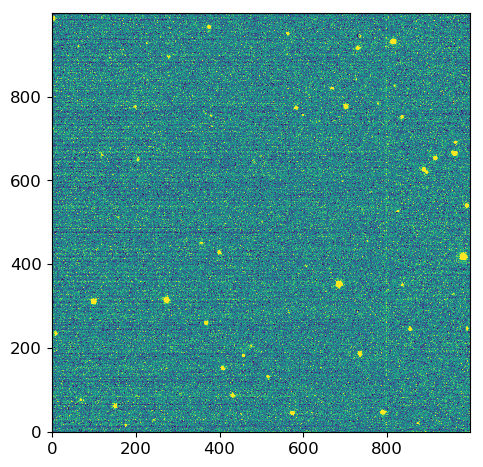

In [30]:
hdul = fits.open(allfits[0])

fig, axs = plt.subplots(1, 1, figsize=(5, 6), sharex=False, sharey=False, gridspec_kw=None)
zimshow(axs, hdul[0].data)
plt.tight_layout()

This itself is of course inferior to ``ds9`` and ``ginga``, becaus we cannot do much interactive works.

## 3-4. Making New FITS and Saving

If you did some operations to the image and want to save it, 

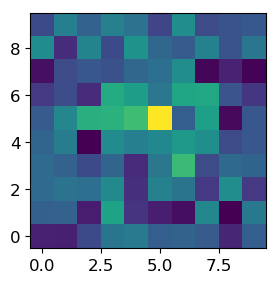

In [34]:
hdul = fits.open(allfits[0])
data = hdul[0].data
newdata = np.sqrt(data[495:505, 495:505])

fig, axs = plt.subplots(1, 1, figsize=(3, 3), sharex=False, sharey=False, gridspec_kw=None)
zimshow(axs, newdata)
plt.tight_layout()

In [37]:
newhdu = fits.PrimaryHDU(data=newdata,
                        header=hdul[0].header)
newhdu.writeto(Path("tmp") / "test.fits", overwrite=True, output_verify='fix')

For the options when writing, please look at the official document ([here](https://astropy.readthedocs.io/en/stable/io/fits/api/files.html#astropy.io.fits.writeto)).